In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = np.load('/Users/pozzolabadmin/Documents/codebase/data/SweepRArPSplineV2/sphereR.npz')

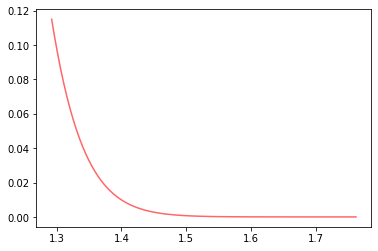

In [18]:
from scipy.stats import lognorm
scale = 1
s = 0.1
loc = 0.5
params = {'s':s, 'loc':loc, 'scale':scale}
x = np.linspace(lognorm.ppf(0.01, **params),
                lognorm.ppf(0.99, **params), 100)
plt.plot(x, lognorm.pdf(x, s),
       'r-', alpha=0.6, label='lognorm pdf')

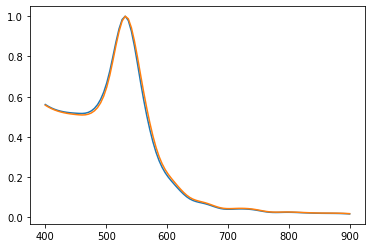

In [69]:
xq = np.einsum('i,i,ij->j',np.hstack([1,2*np.ones(18), 1]), 
               dist.pdf(data['R']), data['ext'])
plt.plot(data['wl'], xq/np.max(xq))
xt = data['ext'][data['R']==20].squeeze()
plt.plot(data['wl'], xt/np.max(xt))
plt.show()

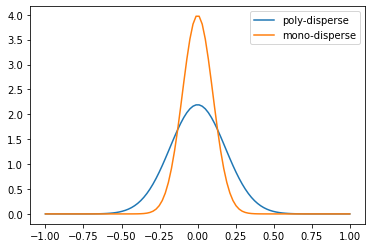

In [144]:
from scipy.stats import norm
dist = norm(loc=0, scale=0.152)

n_sizes = 1000
grid_points = np.linspace(-1,1,num=100)
def gaussian(mu,sig):
    scale = 1/(np.sqrt(2*np.pi)*sig)
    return scale*np.exp(-np.power(grid_points - mu, 2.) / (2 * np.power(sig, 2.)))

R = dist.rvs(size=n_sizes)
X = np.asarray([gaussian(r,0.1) for r in R])
flags = np.argsort(R)
integrand = np.einsum('i,ij->ij',dist.pdf(R[flags]), X[flags,:])
integral = np.trapz(integrand, x=R[flags], axis=0)
plt.plot(grid_points, integral, label='poly-disperse')
xt = gaussian(0,0.1)
plt.plot(grid_points, xt, label='mono-disperse')
plt.legend()
plt.show()